Notebook to combine and bin data for the NHL from 2014-2019

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
data1 = "nhl odds 2014-15.csv"
data2 = "nhl odds 2015-16.csv"
data3 = "nhl odds 2016-17.csv"
data4 = "nhl odds 2017-18.csv"
data5 = "nhl odds 2018-19.csv"

# Read the mouse data and the study results
data1 = pd.read_csv(data1)
data2 = pd.read_csv(data2)
data3 = pd.read_csv(data3)
data4 = pd.read_csv(data4)
data5 = pd.read_csv(data5)


In [90]:
#put the frames of the different seasons into a list
frames = [data1, data2, data3, data4, data5]

#stack the frames into a single set for analysis
df = pd.concat(frames)
df2 = pd.concat(frames)
away_df = df[df['VH']=='V'].reset_index()
home_df = df[df['VH']=='H'].reset_index()



df.reset_index()

index  Date  Rot VH          Team  1st  2nd  3rd  Final  Open  Close  \
0          0  1008    1  V      Montreal    1    1    2      4  -105   -105   
1          1  1008    2  H       Toronto    2    0    1      3  -115   -115   
2          2  1008    3  V  Philadelphia    0    0    1      1   165    165   
3          3  1008    4  H        Boston    1    0    1      2  -195   -185   
4          4  1008    5  V       SanJose    1    3    0      4   101    130   
...      ...   ...  ... ..           ...  ...  ...  ...    ...   ...    ...   
13335   2711   606   10  H        Boston    0    0    1      1  -155   -160   
13336   2712   609   11  V        Boston    1    0    4      5   100    105   
13337   2713   609   12  H      St.Louis    0    0    1      1  -120   -115   
13338   2714   612   13  V      St.Louis    2    0    2      4   151    155   
13339   2715   612   14  H        Boston    0    0    1      1  -175   -170   

       Puck Line  Unnamed: 11  Open OU  Unnamed: 13  Close OU  Unnamed: 15  
0            1.5       -305.0      5.5          106       5.5          110  
1           -1.5        250.0      5.5         -126       5.5         -130  
2            1.5       -180.0      5.5          123       5.5          115  
3           -1.5        155.0      5.5         -143       5.5         -135  
4            1.5       -240.0      5.5          127       5.0         -136  
...          ...          ...      ...          ...       ...          ...  
13335       -1.5        176.0      5.5         -110       5.5         -135  
13336        1.5       -280.0      5.0         -110       5.0         -150  
13337       -1.5        230.0      5.0         -110       5.0          130  
13338        1.5       -183.0      5.5         -110       5.0         -120  
13339       -1.5        159.0      5.5         -110       5.0          100  

[13340 rows x 17 columns]

In [109]:
# away_df
df.iloc[6]
df.iloc[7]


Date              1008
Rot                  8
VH                   H
Team           Calgary
1st                  0
2nd                  2
3rd                  0
Final                2
Open               111
Close              106
Puck Line          1.5
Unnamed: 11       -275
Open OU            5.5
Unnamed: 13       -143
Close OU             5
Unnamed: 15        120
Point Dif           -2
Name: 7, dtype: object

<BarContainer object of 2 artists>

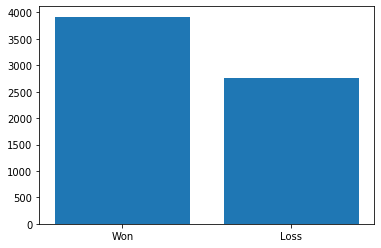

In [133]:
p_dif = []

for i in range(1, df.shape[0], 2):
        home_dif = df['Final'].iloc[i] - df['Final'].iloc[i-1]
        away_dif = df['Final'].iloc[i-1] - df['Final'].iloc[i]
        p_dif.append(away_dif)
        p_dif.append(home_dif)

        
df['Point Dif'] = p_dif
df.reset_index()

fav = []

for i in range(1,df.shape[0], 2):
    if (df['Close'].iloc[i] < df['Close'].iloc[i-1]):
        fav.append(df.iloc[i])
    else:
        fav.append(df.iloc[i-1])

fav
fav_df = pd.DataFrame(fav)
fav_df



def set_winner(row):
    if row['Point Dif'] > 0:
        return 'Won'
    else:
        return 'Loss'
        
new_df = fav_df.assign(Result=fav_df.apply(set_winner, axis=1)) 

# winner = fav_df['Point Dif'] > 0 
# loser = fav_df['Point Dif'] < 0 

# favored_win = fav_df[winner]
# favored_win
# favored_win.assign(Result='Won')




new_df['Result'].value_counts()
win_loss = ['Won','Loss']
plt.bar(win_loss,new_df['Result'].value_counts())

In [66]:
# winner = df['Point Dif'] > 0 
# loser = df['Point Dif'] < 0 
# win = df[winner]
# win.loc[win['VH'] == 'H']


# x = df.reset_index()


# g = x[x['Puck Line'] > 1.5].index
# l = x[x['Puck Line'] < -1.5].index


# x1 = x.drop(g | l)
# # x1['Puck Line'].value_counts()
# w = x1['Point Dif'] > 0 
# l = x1['Point Dif'] < 0




# w1 = x1[w]
# l1 = x1[l]
# # plt.scatter(x1['Puck Line'],x1['Point Dif'])
# # plt.scatter( x1[l]['Close'], x1[l]['Point Dif'] )

# fav = x1['Close'] < 0
# under = x1['Close'] > 0
# len(w1[fav])
# len(w1[under])
# los = df[loser]
# los.loc[los['VH'] == 'V']

In [104]:
for i in range(0,df.shape[0], 1):
    print(df.iloc[i])

Date               1008
Rot                   1
VH                    V
Team           Montreal
1st                   1
2nd                   1
3rd                   2
Final                 4
Open               -105
Close              -105
Puck Line           1.5
Unnamed: 11        -305
Open OU             5.5
Unnamed: 13         106
Close OU            5.5
Unnamed: 15         110
Point Dif             1
Name: 0, dtype: object
Date              1008
Rot                  2
VH                   H
Team           Toronto
1st                  2
2nd                  0
3rd                  1
Final                3
Open              -115
Close             -115
Puck Line         -1.5
Unnamed: 11        250
Open OU            5.5
Unnamed: 13       -126
Close OU           5.5
Unnamed: 15       -130
Point Dif           -1
Name: 1, dtype: object
Date                   1008
Rot                       3
VH                        V
Team           Philadelphia
1st                       0
2nd            

Name: 336, dtype: object
Date              1102
Rot                 62
VH                   H
Team           Chicago
1st                  0
2nd                  0
3rd                  0
Final                0
Open              -250
Close             -250
Puck Line         -1.5
Unnamed: 11        115
Open OU            5.5
Unnamed: 13       -120
Close OU           5.5
Unnamed: 15       -125
Point Dif           -1
Name: 337, dtype: object
Date                1102
Rot                   63
VH                     V
Team           Nashville
1st                    0
2nd                    1
3rd                    2
Final                  3
Open                 100
Close               -101
Puck Line            1.5
Unnamed: 11         -290
Open OU                5
Unnamed: 13         -130
Close OU               5
Unnamed: 15         -130
Point Dif              2
Name: 338, dtype: object
Date                1102
Rot                   64
VH                     H
Team           Vancouver
1st      

Date               1125
Rot                   7
VH                    V
Team           Edmonton
1st                   1
2nd                   0
3rd                   1
Final                 2
Open                160
Close               160
Puck Line           1.5
Unnamed: 11        -180
Open OU             5.5
Unnamed: 13        -110
Close OU            5.5
Unnamed: 15        -125
Point Dif            -1
Name: 636, dtype: object
Date             1125
Rot                 8
VH                  H
Team           Dallas
1st                 1
2nd                 2
3rd                 0
Final               3
Open             -190
Close            -190
Puck Line        -1.5
Unnamed: 11       155
Open OU           5.5
Unnamed: 13      -110
Close OU          5.5
Unnamed: 15       105
Point Dif           1
Name: 637, dtype: object
Date               1125
Rot                   9
VH                    V
Team           Colorado
1st                   0
2nd                   1
3rd                   2


Name: 945, dtype: object
Date               1218
Rot                  63
VH                    V
Team           Edmonton
1st                   1
2nd                   2
3rd                   0
Final                 3
Open                210
Close               225
Puck Line           1.5
Unnamed: 11        -125
Open OU             5.5
Unnamed: 13         110
Close OU              5
Unnamed: 15        -135
Point Dif            -1
Name: 946, dtype: object
Date              1218
Rot                 64
VH                   H
Team           SanJose
1st                  0
2nd                  2
3rd                  2
Final                4
Open              -260
Close             -275
Puck Line         -1.5
Unnamed: 11        105
Open OU            5.5
Unnamed: 13       -130
Close OU             5
Unnamed: 15        115
Point Dif            1
Name: 947, dtype: object
Date               1219
Rot                   1
VH                    V
Team           TampaBay
1st                   0
2nd   

Name: 1210, dtype: object
Date                108
Rot                  66
VH                    H
Team           Colorado
1st                   2
2nd                   1
3rd                   2
Final                 5
Open               -135
Close              -130
Puck Line          -1.5
Unnamed: 11         215
Open OU             5.5
Unnamed: 13        -135
Close OU            5.5
Unnamed: 15        -138
Point Dif             3
Name: 1211, dtype: object
Date               108
Rot                 67
VH                   V
Team           Florida
1st                  1
2nd                  2
3rd                  0
Final                3
Open               140
Close              130
Puck Line          1.5
Unnamed: 11       -230
Open OU              5
Unnamed: 13       -115
Close OU             5
Unnamed: 15       -115
Point Dif            2
Name: 1212, dtype: object
Date                 108
Rot                   68
VH                     H
Team           Vancouver
1st                    

Name: 1522, dtype: object
Date              205
Rot                 6
VH                  H
Team           Ottawa
1st                 0
2nd                 1
3rd                 0
Final               1
Open              105
Close             125
Puck Line         1.5
Unnamed: 11      -235
Open OU           5.5
Unnamed: 13      -120
Close OU          5.5
Unnamed: 15      -130
Point Dif          -1
Name: 1523, dtype: object
Date                  205
Rot                     7
VH                      V
Team           LosAngeles
1st                     1
2nd                     0
3rd                     1
Final                   2
Open                 -120
Close                -130
Puck Line            -1.5
Unnamed: 11           210
Open OU                 5
Unnamed: 13          -110
Close OU                5
Unnamed: 15          -130
Point Dif              -1
Name: 1524, dtype: object
Date               205
Rot                  8
VH                   H
Team           Florida
1st           

Name: 1784, dtype: object
Date                 223
Rot                    2
VH                     H
Team           NewJersey
1st                    1
2nd                    0
3rd                    2
Final                  3
Open                -195
Close               -175
Puck Line           -1.5
Unnamed: 11          170
Open OU                5
Unnamed: 13         -115
Close OU               5
Unnamed: 15         -135
Point Dif              3
Name: 1785, dtype: object
Date               223
Rot                  3
VH                   V
Team           Detroit
1st                  0
2nd                  2
3rd                  1
Final                3
Open               125
Close              115
Puck Line          1.5
Unnamed: 11       -250
Open OU            5.5
Unnamed: 13       -110
Close OU           5.5
Unnamed: 15        110
Point Dif           -1
Name: 1786, dtype: object
Date               223
Rot                  4
VH                   H
Team           Anaheim
1st           

Name: 2057, dtype: object
Date                 314
Rot                   73
VH                     V
Team           Nashville
1st                    0
2nd                    0
3rd                    2
Final                  2
Open                 140
Close                145
Puck Line            1.5
Unnamed: 11         -225
Open OU                5
Unnamed: 13         -115
Close OU               5
Unnamed: 15          105
Point Dif              1
Name: 2058, dtype: object
Date                  314
Rot                    74
VH                      H
Team           LosAngeles
1st                     1
2nd                     0
3rd                     0
Final                   1
Open                 -160
Close                -165
Puck Line            -1.5
Unnamed: 11           190
Open OU                 5
Unnamed: 13          -105
Close OU                5
Unnamed: 15          -125
Point Dif              -1
Name: 2059, dtype: object
Date               315
Rot                  1
VH       

Name: 2346, dtype: object
Date              404
Rot                14
VH                  H
Team           Boston
1st                 0
2nd                 1
3rd                 0
Final               2
Open             -290
Close            -300
Puck Line        -1.5
Unnamed: 11      -115
Open OU           5.5
Unnamed: 13      -125
Close OU          5.5
Unnamed: 15      -130
Point Dif           1
Name: 2347, dtype: object
Date                404
Rot                  15
VH                    V
Team           TampaBay
1st                   0
2nd                   2
3rd                   2
Final                 4
Open               -130
Close              -120
Puck Line          -1.5
Unnamed: 11         260
Open OU             5.5
Unnamed: 13         105
Close OU            5.5
Unnamed: 15         115
Point Dif             4
Name: 2348, dtype: object
Date               404
Rot                 16
VH                   H
Team           Florida
1st                  0
2nd                  0
3r

Name: 2608, dtype: object
Date               521
Rot                 62
VH                   H
Team           Chicago
1st                  1
2nd                  0
3rd                  0
Final                1
Open              -135
Close             -160
Puck Line         -1.5
Unnamed: 11        195
Open OU              5
Unnamed: 13        120
Close OU             5
Unnamed: 15        125
Point Dif           -1
Name: 2609, dtype: object
Date                 522
Rot                   63
VH                     V
Team           NYRangers
1st                    1
2nd                    2
3rd                    2
Final                  5
Open                 110
Close                120
Puck Line            1.5
Unnamed: 11         -260
Open OU                5
Unnamed: 13         -115
Close OU               5
Unnamed: 15         -105
Point Dif              4
Name: 2610, dtype: object
Date                522
Rot                  64
VH                    H
Team           TampaBay
1st       

Name: 231, dtype: object
Date               1024
Rot                  73
VH                    V
Team           Carolina
1st                   0
2nd                   2
3rd                   0
Final                 2
Open                170
Close               172
Puck Line           1.5
Unnamed: 11        -160
Open OU               5
Unnamed: 13        -120
Close OU              5
Unnamed: 15        -105
Point Dif            -3
Name: 232, dtype: object
Date              1024
Rot                 74
VH                   H
Team           SanJose
1st                  2
2nd                  2
3rd                  1
Final                5
Open              -200
Close             -202
Puck Line         -1.5
Unnamed: 11        140
Open OU              5
Unnamed: 13        100
Close OU             5
Unnamed: 15       -115
Point Dif            3
Name: 233, dtype: object
Date                1025
Rot                    1
VH                     V
Team           Minnesota
1st                    1
2

Name: 491, dtype: object
Date                 1114
Rot                     3
VH                      V
Team           Pittsburgh
1st                     0
2nd                     0
3rd                     0
Final                   0
Open                 -105
Close                -115
Puck Line            -1.5
Unnamed: 11           255
Open OU                 5
Unnamed: 13           105
Close OU                5
Unnamed: 15           110
Point Dif              -4
Name: 492, dtype: object
Date                1114
Rot                    4
VH                     H
Team           NewJersey
1st                    1
2nd                    1
3rd                    2
Final                  4
Open                -115
Close               -105
Puck Line            1.5
Unnamed: 11         -320
Open OU                5
Unnamed: 13         -125
Close OU               5
Unnamed: 15         -130
Point Dif              4
Name: 493, dtype: object
Date                   1114
Rot                       5
VH

Name: 796, dtype: object
Date               1206
Rot                  54
VH                    H
Team           Carolina
1st                   2
2nd                   1
3rd                   2
Final                 5
Open               -136
Close              -135
Puck Line          -1.5
Unnamed: 11         220
Open OU               5
Unnamed: 13         110
Close OU              5
Unnamed: 15         115
Point Dif             1
Name: 797, dtype: object
Date              1206
Rot                 55
VH                   V
Team           Florida
1st                  0
2nd                  2
3rd                  0
Final                2
Open              -105
Close              110
Puck Line          1.5
Unnamed: 11       -275
Open OU              5
Unnamed: 13        115
Close OU             5
Unnamed: 15        120
Point Dif           -2
Name: 798, dtype: object
Date                1206
Rot                   56
VH                     H
Team           NewJersey
1st                    2
2

Name: 1124, dtype: object
Date              1231
Rot                 66
VH                   H
Team           Calgary
1st                  0
2nd                  0
3rd                  1
Final                1
Open               110
Close              110
Puck Line          1.5
Unnamed: 11       -260
Open OU            5.5
Unnamed: 13       -125
Close OU           5.5
Unnamed: 15       -150
Point Dif           -3
Name: 1125, dtype: object
Date              1231
Rot                 67
VH                   V
Team           Anaheim
1st                  1
2nd                  0
3rd                  0
Final                1
Open              -115
Close             -135
Puck Line         -1.5
Unnamed: 11        210
Open OU              5
Unnamed: 13       -135
Close OU             5
Unnamed: 15       -140
Point Dif            1
Name: 1126, dtype: object
Date               1231
Rot                  68
VH                    H
Team           Edmonton
1st                   0
2nd                 

Name: 1449, dtype: object
Date               125
Rot                  9
VH                   V
Team           Arizona
1st                  0
2nd                  0
3rd                  1
Final                2
Open               155
Close              150
Puck Line          1.5
Unnamed: 11       -200
Open OU              5
Unnamed: 13       -115
Close OU             5
Unnamed: 15       -115
Point Dif            1
Name: 1450, dtype: object
Date                 125
Rot                   10
VH                     H
Team           Minnesota
1st                    0
2nd                    0
3rd                    1
Final                  1
Open                -175
Close               -170
Puck Line           -1.5
Unnamed: 11          170
Open OU                5
Unnamed: 13         -105
Close OU               5
Unnamed: 15         -105
Point Dif             -1
Name: 1451, dtype: object
Date               125
Rot                 11
VH                   V
Team           Calgary
1st           

Date                 218
Rot                    7
VH                     V
Team           NYRangers
1st                    0
2nd                    2
3rd                    2
Final                  4
Open                -158
Close               -135
Puck Line           -1.5
Unnamed: 11          210
Open OU                5
Unnamed: 13         -130
Close OU             5.5
Unnamed: 15          100
Point Dif              2
Name: 1714, dtype: object
Date               218
Rot                  8
VH                   H
Team           Toronto
1st                  1
2nd                  0
3rd                  1
Final                2
Open               138
Close              115
Puck Line          1.5
Unnamed: 11       -260
Open OU              5
Unnamed: 13        110
Close OU           5.5
Unnamed: 15       -120
Point Dif           -2
Name: 1715, dtype: object
Date                218
Rot                   9
VH                    V
Team           Winnipeg
1st                   0
2nd         

Name: 1984, dtype: object
Date                308
Rot                  56
VH                    H
Team           Columbus
1st                   0
2nd                   2
3rd                   3
Final                 5
Open               -106
Close               105
Puck Line           1.5
Unnamed: 11        -300
Open OU             5.5
Unnamed: 13        -120
Close OU            5.5
Unnamed: 15        -125
Point Dif             2
Name: 1985, dtype: object
Date              308
Rot                57
VH                  V
Team           Boston
1st                 0
2nd                 0
3rd                 0
Final               1
Open              145
Close             135
Puck Line         1.5
Unnamed: 11      -240
Open OU           5.5
Unnamed: 13       100
Close OU          5.5
Unnamed: 15       100
Point Dif           1
Name: 1986, dtype: object
Date                308
Rot                  58
VH                    H
Team           TampaBay
1st                   0
2nd                 

Name: 2296, dtype: object
Date               330
Rot                 56
VH                   H
Team           Anaheim
1st                  3
2nd                  4
3rd                  1
Final                8
Open              -260
Close             -260
Puck Line         -1.5
Unnamed: 11        110
Open OU            5.5
Unnamed: 13       -125
Close OU           5.5
Unnamed: 15       -145
Point Dif            5
Name: 2297, dtype: object
Date                331
Rot                   1
VH                    V
Team           Columbus
1st                   1
2nd                   1
3rd                   1
Final                 3
Open                170
Close               155
Puck Line           1.5
Unnamed: 11        -205
Open OU             5.5
Unnamed: 13         110
Close OU            5.5
Unnamed: 15         110
Point Dif            -1
Name: 2298, dtype: object
Date                   331
Rot                      2
VH                       H
Team           NYIslanders
1st            

Name: 2566, dtype: object
Date              501
Rot                14
VH                  H
Team           Dallas
1st                 1
2nd                 0
3rd                 2
Final               3
Open              100
Close            -125
Puck Line        -1.5
Unnamed: 11       230
Open OU             5
Unnamed: 13       100
Close OU            5
Unnamed: 15       105
Point Dif          -1
Name: 2567, dtype: object
Date                 501
Rot                   15
VH                     V
Team           Nashville
1st                    0
2nd                    0
3rd                    2
Final                  2
Open                 145
Close                142
Puck Line            1.5
Unnamed: 11         -210
Open OU                5
Unnamed: 13         -120
Close OU               5
Unnamed: 15         -102
Point Dif             -1
Name: 2568, dtype: object
Date               501
Rot                 16
VH                   H
Team           SanJose
1st                  0
2nd     

Name: 209, dtype: object
Date                1027
Rot                   67
VH                     V
Team           Nashville
1st                    0
2nd                    1
3rd                    1
Final                  2
Open                 120
Close                131
Puck Line            1.5
Unnamed: 11         -234
Open OU              5.5
Unnamed: 13         -105
Close OU             5.5
Unnamed: 15          110
Point Dif             -1
Name: 210, dtype: object
Date                 1027
Rot                    68
VH                      H
Team           LosAngeles
1st                     0
2nd                     1
3rd                     1
Final                   3
Open                 -140
Close                -151
Puck Line            -1.5
Unnamed: 11           195
Open OU               5.5
Unnamed: 13          -115
Close OU              5.5
Unnamed: 15          -130
Point Dif               1
Name: 211, dtype: object
Date              1028
Rot                  1
VH          

Name: 472, dtype: object
Date                1115
Rot                   66
VH                     H
Team           Minnesota
1st                    0
2nd                    0
3rd                    0
Final                  0
Open                -175
Close               -172
Puck Line           -1.5
Unnamed: 11          170
Open OU                5
Unnamed: 13          110
Close OU               5
Unnamed: 15          125
Point Dif             -1
Name: 473, dtype: object
Date              1115
Rot                 67
VH                   V
Team           Chicago
1st                  0
2nd                  0
3rd                  0
Final                0
Open              -120
Close             -147
Puck Line         -1.5
Unnamed: 11        215
Open OU            5.5
Unnamed: 13        105
Close OU           5.5
Unnamed: 15        120
Point Dif           -4
Name: 474, dtype: object
Date               1115
Rot                  68
VH                    H
Team           Winnipeg
1st          

Name: 744, dtype: object
Date                  1204
Rot                      6
VH                       H
Team           NYIslanders
1st                      1
2nd                      0
3rd                      2
Final                    3
Open                  -148
Close                 -150
Puck Line             -1.5
Unnamed: 11            195
Open OU                  5
Unnamed: 13            105
Close OU                 5
Unnamed: 15            110
Point Dif               -1
Name: 745, dtype: object
Date                   1204
Rot                       7
VH                        V
Team           Philadelphia
1st                       1
2nd                       2
3rd                       1
Final                     4
Open                    130
Close                   119
Puck Line               1.5
Unnamed: 11            -240
Open OU                 5.5
Unnamed: 13             100
Close OU                5.5
Unnamed: 15            -110
Point Dif                 2
Name: 746, dtyp

Name: 1013, dtype: object
Date               1223
Rot                  59
VH                    V
Team           TampaBay
1st                   0
2nd                   0
3rd                   0
Final                 0
Open                205
Close               195
Puck Line           1.5
Unnamed: 11        -170
Open OU               5
Unnamed: 13        -135
Close OU              5
Unnamed: 15        -110
Point Dif            -4
Name: 1014, dtype: object
Date                 1223
Rot                    60
VH                      H
Team           Washington
1st                     2
2nd                     1
3rd                     1
Final                   4
Open                 -245
Close                -235
Puck Line            -1.5
Unnamed: 11           150
Open OU                 5
Unnamed: 13           115
Close OU                5
Unnamed: 15          -110
Point Dif               4
Name: 1015, dtype: object
Date             1223
Rot                61
VH                  V
Team  

Name: 1315, dtype: object
Date                116
Rot                   9
VH                    V
Team           Winnipeg
1st                   0
2nd                   0
3rd                   2
Final                 2
Open                180
Close               161
Puck Line           1.5
Unnamed: 11        -180
Open OU               5
Unnamed: 13        -140
Close OU              5
Unnamed: 15        -140
Point Dif            -3
Name: 1316, dtype: object
Date               116
Rot                 10
VH                   H
Team           SanJose
1st                  1
2nd                  2
3rd                  2
Final                5
Open              -210
Close             -181
Puck Line         -1.5
Unnamed: 11        160
Open OU              5
Unnamed: 13        120
Close OU             5
Unnamed: 15        120
Point Dif            3
Name: 1317, dtype: object
Date                  116
Rot                    11
VH                      V
Team           Washington
1st                

Name: 1635, dtype: object
Date               211
Rot                 11
VH                   V
Team           Detroit
1st                  1
2nd                  0
3rd                  0
Final                1
Open               180
Close              148
Puck Line          1.5
Unnamed: 11       -227
Open OU            5.5
Unnamed: 13        110
Close OU           5.5
Unnamed: 15       -115
Point Dif           -1
Name: 1636, dtype: object
Date                211
Rot                  12
VH                    H
Team           Columbus
1st                   1
2nd                   1
3rd                   0
Final                 2
Open               -210
Close              -168
Puck Line          -1.5
Unnamed: 11         188
Open OU             5.5
Unnamed: 13        -130
Close OU            5.5
Unnamed: 15        -105
Point Dif             1
Name: 1637, dtype: object
Date                211
Rot                  13
VH                    V
Team           St.Louis
1st                   1
2nd

Name: 1951, dtype: object
Date                307
Rot                  11
VH                    V
Team           Carolina
1st                   1
2nd                   0
3rd                   0
Final                 1
Open               -155
Close              -140
Puck Line          -1.5
Unnamed: 11         205
Open OU               5
Unnamed: 13        -140
Close OU              5
Unnamed: 15        -140
Point Dif            -2
Name: 1952, dtype: object
Date                307
Rot                  12
VH                    H
Team           Colorado
1st                   0
2nd                   2
3rd                   1
Final                 3
Open                135
Close               120
Puck Line           1.5
Unnamed: 11        -245
Open OU               5
Unnamed: 13         120
Close OU              5
Unnamed: 15         120
Point Dif             2
Name: 1953, dtype: object
Date                   307
Rot                     13
VH                       V
Team           NYIslander

Name: 2248, dtype: object
Date               327
Rot                 12
VH                   H
Team           Calgary
1st                  1
2nd                  1
3rd                  2
Final                4
Open              -290
Close             -290
Puck Line         -1.5
Unnamed: 11       -110
Open OU            5.5
Unnamed: 13       -135
Close OU           5.5
Unnamed: 15       -140
Point Dif            2
Name: 2249, dtype: object
Date                 328
Rot                   51
VH                     V
Team           Nashville
1st                    0
2nd                    0
3rd                    1
Final                  1
Open                 135
Close                150
Puck Line            1.5
Unnamed: 11         -205
Open OU              5.5
Unnamed: 13         -110
Close OU             5.5
Unnamed: 15          100
Point Dif             -3
Name: 2250, dtype: object
Date              328
Rot                52
VH                  H
Team           Boston
1st               

Name: 2519, dtype: object
Date               419
Rot                 63
VH                   V
Team           Anaheim
1st                  2
2nd                  0
3rd                  1
Final                3
Open              -105
Close              104
Puck Line          1.5
Unnamed: 11       -315
Open OU              5
Unnamed: 13       -140
Close OU           5.5
Unnamed: 15        120
Point Dif            2
Name: 2520, dtype: object
Date               419
Rot                 64
VH                   H
Team           Calgary
1st                  0
2nd                  1
3rd                  0
Final                1
Open              -115
Close             -124
Puck Line         -1.5
Unnamed: 11        250
Open OU              5
Unnamed: 13        120
Close OU           5.5
Unnamed: 15       -140
Point Dif           -2
Name: 2521, dtype: object
Date                 420
Rot                    1
VH                     V
Team           NYRangers
1st                    1
2nd            

Name: 184, dtype: object
Date               1018
Rot                   4
VH                    H
Team           St.Louis
1st                   1
2nd                   2
3rd                   2
Final                 5
Open               -122
Close              -121
Puck Line          -1.5
Unnamed: 11         225
Open OU             5.5
Unnamed: 13        -110
Close OU            5.5
Unnamed: 15        -115
Point Dif             3
Name: 185, dtype: object
Date               1018
Rot                   5
VH                    V
Team           Montreal
1st                   1
2nd                   0
3rd                   0
Final                 1
Open                140
Close               148
Puck Line           1.5
Unnamed: 11        -205
Open OU               5
Unnamed: 13        -140
Close OU              5
Unnamed: 15        -135
Point Dif            -4
Name: 186, dtype: object
Date                 1018
Rot                     6
VH                      H
Team           LosAngeles
1st  

Name: 478, dtype: object
Date              1109
Rot                 12
VH                   H
Team           Anaheim
1st                  1
2nd                  1
3rd                  2
Final                4
Open              -148
Close             -129
Puck Line         -1.5
Unnamed: 11        220
Open OU            5.5
Unnamed: 13       -130
Close OU           5.5
Unnamed: 15       -125
Point Dif            3
Name: 479, dtype: object
Date               1109
Rot                  13
VH                    V
Team           TampaBay
1st                   4
2nd                   0
3rd                   1
Final                 5
Open                120
Close               110
Puck Line           1.5
Unnamed: 11        -270
Open OU             5.5
Unnamed: 13        -115
Close OU            5.5
Unnamed: 15        -125
Point Dif             3
Name: 480, dtype: object
Date                 1109
Rot                    14
VH                      H
Team           LosAngeles
1st                   

Name: 733, dtype: object
Date                1128
Rot                    3
VH                     V
Team           Vancouver
1st                    1
2nd                    1
3rd                    0
Final                  2
Open                 150
Close                147
Puck Line            1.5
Unnamed: 11         -200
Open OU              5.5
Unnamed: 13         -125
Close OU             5.5
Unnamed: 15         -115
Point Dif             -3
Name: 734, dtype: object
Date                  1128
Rot                      4
VH                       H
Team           NYIslanders
1st                      3
2nd                      1
3rd                      1
Final                    5
Open                  -170
Close                 -167
Puck Line             -1.5
Unnamed: 11            170
Open OU                5.5
Unnamed: 13            105
Close OU               5.5
Unnamed: 15           -105
Point Dif                3
Name: 735, dtype: object
Date              1128
Rot               

Name: 1004, dtype: object
Date                 1216
Rot                    16
VH                      H
Team           Washington
1st                     0
2nd                     0
3rd                     2
Final                   3
Open                 -155
Close                -159
Puck Line            -1.5
Unnamed: 11           180
Open OU               5.5
Unnamed: 13          -125
Close OU              5.5
Unnamed: 15          -120
Point Dif               1
Name: 1005, dtype: object
Date                 1216
Rot                    17
VH                      V
Team           Pittsburgh
1st                     0
2nd                     2
3rd                     2
Final                   4
Open                 -170
Close                -172
Puck Line            -1.5
Unnamed: 11           170
Open OU               5.5
Unnamed: 13          -120
Close OU              5.5
Unnamed: 15          -125
Point Dif               2
Name: 1006, dtype: object
Date              1216
Rot            

Name: 1259, dtype: object
Date             105
Rot               59
VH                 V
Team           Vegas
1st                2
2nd                1
3rd                2
Final              5
Open             105
Close            115
Puck Line        1.5
Unnamed: 11     -275
Open OU            6
Unnamed: 13     -105
Close OU           6
Unnamed: 15     -105
Point Dif          1
Name: 1260, dtype: object
Date               105
Rot                 60
VH                   H
Team           Chicago
1st                  1
2nd                  2
3rd                  1
Final                4
Open              -125
Close             -135
Puck Line         -1.5
Unnamed: 11        225
Open OU              6
Unnamed: 13       -115
Close OU             6
Unnamed: 15       -115
Point Dif           -1
Name: 1261, dtype: object
Date                106
Rot                   1
VH                    V
Team           St.Louis
1st                   0
2nd                   1
3rd                   2
Final 

Name: 1554, dtype: object
Date                 201
Rot                    8
VH                     H
Team           NYRangers
1st                    0
2nd                    0
3rd                    0
Final                  0
Open                -137
Close               -120
Puck Line           -1.5
Unnamed: 11          225
Open OU                6
Unnamed: 13          100
Close OU               6
Unnamed: 15         -123
Point Dif             -4
Name: 1555, dtype: object
Date                201
Rot                   9
VH                    V
Team           Montreal
1st                   0
2nd                   0
3rd                   0
Final                 0
Open                133
Close               138
Puck Line           1.5
Unnamed: 11        -230
Open OU             5.5
Unnamed: 13         105
Close OU            5.5
Unnamed: 15         107
Point Dif            -2
Name: 1556, dtype: object
Date                201
Rot                  10
VH                    H
Team           Ca

Name: 1870, dtype: object
Date                 222
Rot                   66
VH                     H
Team           Nashville
1st                    2
2nd                    1
3rd                    4
Final                  7
Open                -170
Close               -161
Puck Line           -1.5
Unnamed: 11          180
Open OU              5.5
Unnamed: 13         -120
Close OU             5.5
Unnamed: 15         -125
Point Dif              6
Name: 1871, dtype: object
Date               222
Rot                 67
VH                   V
Team           Calgary
1st                  2
2nd                  1
3rd                  2
Final                5
Open              -112
Close             -103
Puck Line          1.5
Unnamed: 11       -290
Open OU            5.5
Unnamed: 13       -120
Close OU           5.5
Unnamed: 15       -115
Point Dif            3
Name: 1872, dtype: object
Date               222
Rot                 68
VH                   H
Team           Arizona
1st           

Name: 2175, dtype: object
Date                 315
Rot                   15
VH                     V
Team           Nashville
1st                    0
2nd                    1
3rd                    2
Final                  3
Open                -165
Close               -181
Puck Line           -1.5
Unnamed: 11          160
Open OU              5.5
Unnamed: 13          100
Close OU             5.5
Unnamed: 15          105
Point Dif              1
Name: 2176, dtype: object
Date               315
Rot                 16
VH                   H
Team           Arizona
1st                  0
2nd                  2
3rd                  0
Final                2
Open               145
Close              161
Puck Line          1.5
Unnamed: 11       -180
Open OU            5.5
Unnamed: 13       -120
Close OU           5.5
Unnamed: 15       -125
Point Dif           -1
Name: 2177, dtype: object
Date               315
Rot                 17
VH                   V
Team           Detroit
1st           

Name: 2480, dtype: object
Date                    405
Rot                      54
VH                        H
Team           Philadelphia
1st                       1
2nd                       1
3rd                       2
Final                     4
Open                   -200
Close                  -200
Puck Line              -1.5
Unnamed: 11             140
Open OU                   6
Unnamed: 13            -115
Close OU                  6
Unnamed: 15            -125
Point Dif                 1
Name: 2481, dtype: object
Date               405
Rot                 55
VH                   V
Team           Toronto
1st                  1
2nd                  0
3rd                  0
Final                1
Open               105
Close             -101
Puck Line          1.5
Unnamed: 11       -274
Open OU              6
Unnamed: 13       -115
Close OU             6
Unnamed: 15       -115
Point Dif           -1
Name: 2482, dtype: object
Date                 405
Rot                   56
VH   

Name: 34, dtype: object
Date              1006
Rot                 54
VH                   H
Team           Toronto
1st                  0
2nd                  3
3rd                  0
Final                3
Open              -265
Close             -290
Puck Line         -1.5
Unnamed: 11       -115
Open OU              6
Unnamed: 13        100
Close OU             6
Unnamed: 15        100
Point Dif           -2
Name: 35, dtype: object
Date               1006
Rot                  55
VH                    V
Team           Winnipeg
1st                   0
2nd                   1
3rd                   0
Final                 1
Open                102
Close              -110
Puck Line          -1.5
Unnamed: 11         235
Open OU               6
Unnamed: 13        -110
Close OU              6
Unnamed: 15        -110
Point Dif            -4
Name: 36, dtype: object
Date             1006
Rot                56
VH                  H
Team           Dallas
1st                 2
2nd                

Name: 328, dtype: object
Date              1029
Rot                 52
VH                   H
Team           Toronto
1st                  0
2nd                  0
3rd                  1
Final                1
Open              -143
Close             -150
Puck Line         -1.5
Unnamed: 11        185
Open OU              6
Unnamed: 13       -110
Close OU             6
Unnamed: 15        105
Point Dif           -2
Name: 329, dtype: object
Date                1029
Rot                   53
VH                     V
Team           Minnesota
1st                    1
2nd                    1
3rd                    0
Final                  2
Open                -140
Close               -160
Puck Line           -1.5
Unnamed: 11          164
Open OU              5.5
Unnamed: 13         -110
Close OU             5.5
Unnamed: 15         -110
Point Dif             -3
Name: 330, dtype: object
Date                1029
Rot                   54
VH                     H
Team           Vancouver
1st      

Name: 575, dtype: object
Date                 1116
Rot                    57
VH                      V
Team           Washington
1st                     0
2nd                     2
3rd                     0
Final                   3
Open                  130
Close                 140
Puck Line             1.5
Unnamed: 11          -210
Open OU                 6
Unnamed: 13          -110
Close OU                6
Unnamed: 15          -105
Point Dif               1
Name: 576, dtype: object
Date               1116
Rot                  58
VH                    H
Team           Colorado
1st                   1
2nd                   0
3rd                   1
Final                 2
Open               -150
Close              -155
Puck Line          -1.5
Unnamed: 11         176
Open OU               6
Unnamed: 13        -110
Close OU              6
Unnamed: 15        -115
Point Dif            -1
Name: 577, dtype: object
Date               1116
Rot                  59
VH                    V
Tea

Name: 846, dtype: object
Date                1204
Rot                   18
VH                     H
Team           Vancouver
1st                    1
2nd                    1
3rd                    0
Final                  2
Open                 144
Close                145
Puck Line            1.5
Unnamed: 11         -200
Open OU                6
Unnamed: 13         -110
Close OU               6
Unnamed: 15         -110
Point Dif             -1
Name: 847, dtype: object
Date              1204
Rot                 19
VH                   V
Team           Arizona
1st                  1
2nd                  1
3rd                  0
Final                2
Open               100
Close              110
Puck Line          1.5
Unnamed: 11       -275
Open OU            5.5
Unnamed: 13       -110
Close OU           5.5
Unnamed: 15        120
Point Dif            1
Name: 848, dtype: object
Date                 1204
Rot                    20
VH                      H
Team           LosAngeles
1st  

Name: 1119, dtype: object
Date                   1223
Rot                      63
VH                        V
Team           Philadelphia
1st                       0
2nd                       1
3rd                       1
Final                     3
Open                   -107
Close                   100
Puck Line               1.5
Unnamed: 11            -280
Open OU                   6
Unnamed: 13            -110
Close OU                  6
Unnamed: 15            -110
Point Dif                 1
Name: 1120, dtype: object
Date                1223
Rot                   64
VH                     H
Team           NYRangers
1st                    1
2nd                    0
3rd                    1
Final                  2
Open                -113
Close               -110
Puck Line           -1.5
Unnamed: 11          230
Open OU                6
Unnamed: 13         -110
Close OU               6
Unnamed: 15         -110
Point Dif             -1
Name: 1121, dtype: object
Date              122

Name: 1381, dtype: object
Date                112
Rot                  43
VH                    V
Team           Columbus
1st                   1
2nd                   0
3rd                   0
Final                 2
Open                125
Close               145
Puck Line           1.5
Unnamed: 11        -185
Open OU               6
Unnamed: 13        -110
Close OU            6.5
Unnamed: 15        -110
Point Dif             1
Name: 1382, dtype: object
Date                  112
Rot                    44
VH                      H
Team           Washington
1st                     0
2nd                     0
3rd                     1
Final                   1
Open                 -145
Close                -160
Puck Line            -1.5
Unnamed: 11           160
Open OU                 6
Unnamed: 13          -110
Close OU              6.5
Unnamed: 15          -110
Point Dif              -1
Name: 1383, dtype: object
Date               112
Rot                 45
VH                   V
Tea

Name: 1634, dtype: object
Date                205
Rot                  20
VH                    H
Team           Winnipeg
1st                   1
2nd                   1
3rd                   0
Final                 2
Open               -133
Close              -125
Puck Line          -1.5
Unnamed: 11         192
Open OU             6.5
Unnamed: 13        -110
Close OU            6.5
Unnamed: 15         105
Point Dif            -1
Name: 1635, dtype: object
Date                205
Rot                  21
VH                    V
Team           Columbus
1st                   2
2nd                   1
3rd                   3
Final                 6
Open                100
Close               105
Puck Line           1.5
Unnamed: 11        -240
Open OU             6.5
Unnamed: 13        -110
Close OU            6.5
Unnamed: 15        -115
Point Dif             3
Name: 1636, dtype: object
Date                205
Rot                  22
VH                    H
Team           Colorado
1st       

Name: 1954, dtype: object
Date             226
Rot               22
VH                 H
Team           Vegas
1st                0
2nd                1
3rd                3
Final              4
Open            -185
Close           -200
Puck Line       -1.5
Unnamed: 11      130
Open OU          5.5
Unnamed: 13     -110
Close OU         5.5
Unnamed: 15     -125
Point Dif          3
Name: 1955, dtype: object
Date               227
Rot                 23
VH                   V
Team           Calgary
1st                  0
2nd                  2
3rd                  0
Final                2
Open              -165
Close             -205
Puck Line         -1.5
Unnamed: 11        125
Open OU            6.5
Unnamed: 13       -110
Close OU           6.5
Unnamed: 15        100
Point Dif            1
Name: 1956, dtype: object
Date                 227
Rot                   24
VH                     H
Team           NewJersey
1st                    0
2nd                    1
3rd                    0

Name: 2272, dtype: object
Date                321
Rot                  32
VH                    H
Team           Carolina
1st                   2
2nd                   1
3rd                   0
Final                 3
Open               -135
Close              -145
Puck Line          -1.5
Unnamed: 11         170
Open OU             6.5
Unnamed: 13        -110
Close OU              7
Unnamed: 15        -120
Point Dif            -3
Name: 2273, dtype: object
Date              321
Rot                33
VH                  V
Team           Boston
1st                 1
2nd                 1
3rd                 3
Final               5
Open             -275
Close            -330
Puck Line        -1.5
Unnamed: 11      -125
Open OU           5.5
Unnamed: 13      -110
Close OU          5.5
Unnamed: 15      -125
Point Dif           4
Name: 2274, dtype: object
Date                 321
Rot                   34
VH                     H
Team           NewJersey
1st                    0
2nd            

Name: 2568, dtype: object
Date                 413
Rot                   64
VH                     H
Team           Nashville
1st                    0
2nd                    1
3rd                    0
Final                  2
Open                -158
Close               -160
Puck Line           -1.5
Unnamed: 11          170
Open OU                5
Unnamed: 13         -110
Close OU               5
Unnamed: 15         -110
Point Dif              1
Name: 2569, dtype: object
Date               413
Rot                 65
VH                   V
Team           Toronto
1st                  0
2nd                  0
3rd                  1
Final                1
Open               128
Close              132
Puck Line          1.5
Unnamed: 11       -212
Open OU              6
Unnamed: 13       -110
Close OU             6
Unnamed: 15       -115
Point Dif           -3
Name: 2570, dtype: object
Date              413
Rot                66
VH                  H
Team           Boston
1st               